# Statistical tests with python
    I will use data from MovieLens, which are movie ratings (with scores from 0.5 to 5), and also from The Movie Database (TMDB).

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Checking the data

In [2]:
tmdb = pd.read_csv('data/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


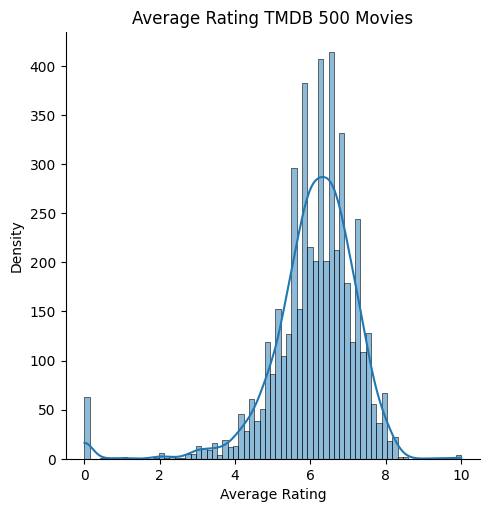

In [4]:
ax = sns.displot(tmdb.vote_average, kde=True)
ax.set(xlabel='Average Rating', ylabel='Density', title='Average Rating TMDB 500 Movies')
ax = ax


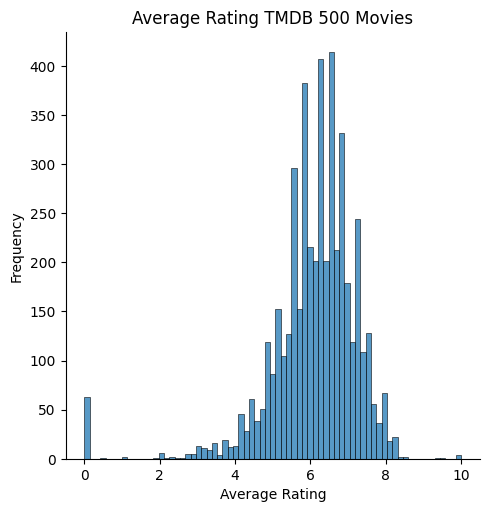

In [5]:
# check how many movies got rating

ax = sns.displot(tmdb.vote_average, kde=False)
ax.set(xlabel='Average Rating', ylabel='Frequency', title='Average Rating TMDB 500 Movies')

ax = ax


[Text(0.5, 0, 'Average Rating'),
 Text(0.5, 1.0, 'Average Rating TMDB 500 Movies')]

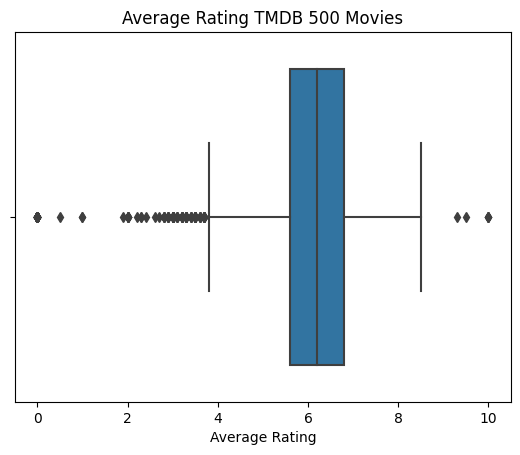

In [6]:
ax = sns.boxplot(x=tmdb.vote_average)
ax.set(xlabel='Average Rating', title='Average Rating TMDB 500 Movies')

# Cleaning Data
     Something odd on this dataset, it doesn't make sense movies which have average rating 0 or 10. I'll check it out.

In [7]:
# check movies with 0 rating
tmdb.query('vote_average == 0')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 37, ""nam...",NaN,69382,[],en,The Legend of God's Gun,A gun-slinging preacher returns to the debauch...,0.003582,[],[],2007-07-08,0,78.0,[],Released,NaN,The Legend of God's Gun,0.0,0
4771,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,220490,[],en,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...",0.056459,[],[],2013-04-19,0,89.0,[],Released,NaN,Her Cry: La Llorona Investigation,0.0,0
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],[],2015-10-02,0,90.0,[],Released,NaN,Dutch Kills,0.0,0
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2014-09-05,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0


In [8]:
# check movies with 10 rating
tmdb.query('vote_average == 10')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


    I'm not gonna use the movies that got less than 10 votes. Cause is too little to be considered a good sample, and also because the vote average is not reliable.

In [9]:
#check movies got vote count greater or equal 10
tmdb_greater_10_votes =  tmdb.query('vote_count >= 10')

In [10]:
tmdb_greater_10_votes.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


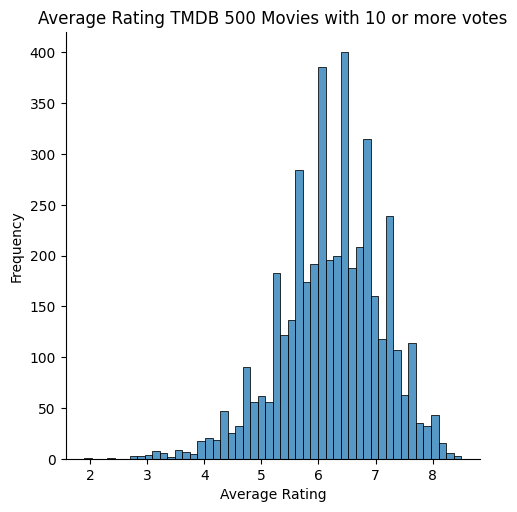

In [11]:
# check how many movies got rating

ax = sns.displot(tmdb_greater_10_votes.vote_average, kde=False)
ax.set(xlabel='Average Rating', ylabel='Frequency', title='Average Rating TMDB 500 Movies with 10 or more votes')

ax = ax


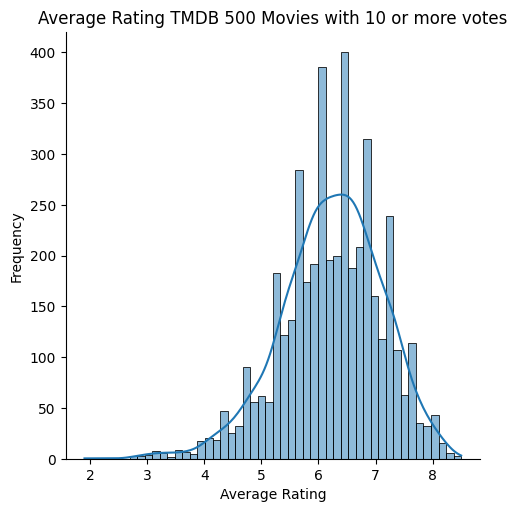

In [12]:
ax = sns.displot(tmdb_greater_10_votes.vote_average, kde=True)
ax.set(xlabel='Average Rating', ylabel='Frequency', title='Average Rating TMDB 500 Movies with 10 or more votes')

ax = ax

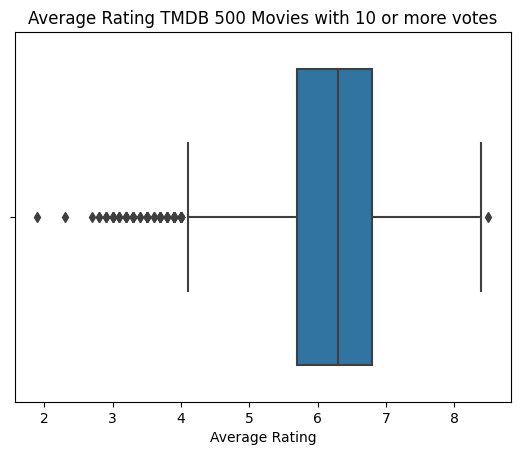

In [13]:
ax = sns.boxplot(x=tmdb_greater_10_votes.vote_average)
ax.set(xlabel='Average Rating', title='Average Rating TMDB 500 Movies with 10 or more votes')
ax = ax

# Analyzing Movielens data

In [14]:
rates = pd.read_csv('data/ratings.csv')
rates.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
# calculate average rating per movie
average_per_movie = rates.groupby('movieId').mean()['rating']
average_per_movie.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

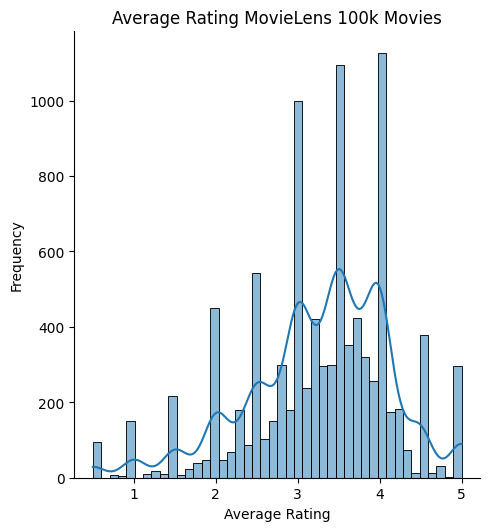

In [16]:
ax = sns.displot(average_per_movie.values, kde=True)
ax.set(xlabel='Average Rating', ylabel='Frequency', title='Average Rating MovieLens 100k Movies')

ax = ax

## Cleaning the data

In [17]:
# check how many movies got rating
qnt_votes_movies = rates.groupby('movieId').count()
qnt_votes_movies.head()

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49


In [18]:
# select movies with 10 or more votes
qnt_votes_movies_10 = qnt_votes_movies.query('rating >= 10')
qnt_votes_movies_10.head()

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
5,49,49,49
6,102,102,102


In [19]:
# select movieID to get the quantity of votes
movies_least_10_votes = qnt_votes_movies_10.index
movies_least_10_votes.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [20]:
# select average rating per movie with 10 or more votes
avg_rating_movies_least_10_votes =  average_per_movie.loc[movies_least_10_votes.values]
avg_rating_movies_least_10_votes.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

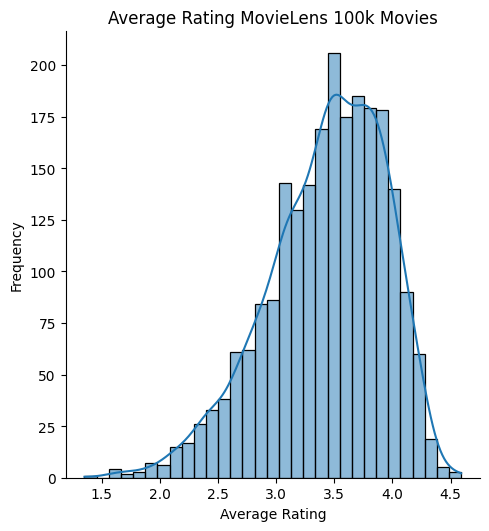

In [21]:
ax = sns.displot(avg_rating_movies_least_10_votes.values, kde=True)
ax.set(xlabel='Average Rating', ylabel='Frequency', title='Average Rating MovieLens 100k Movies')

ax = ax

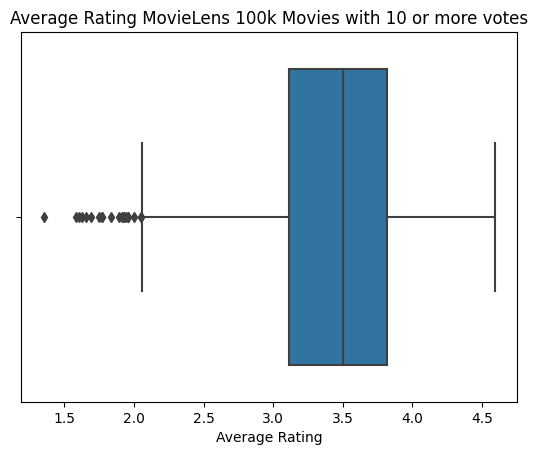

In [22]:
# create boxplot
ax = sns.boxplot(x=avg_rating_movies_least_10_votes.values)
ax.set(xlabel='Average Rating', title='Average Rating MovieLens 100k Movies with 10 or more votes')
ax = ax

# Cumulative plot
    For example, assuming the movie Toy Story has a 3.9 rating... what does that say about this movie? And a good movie? It seems so... but how good?

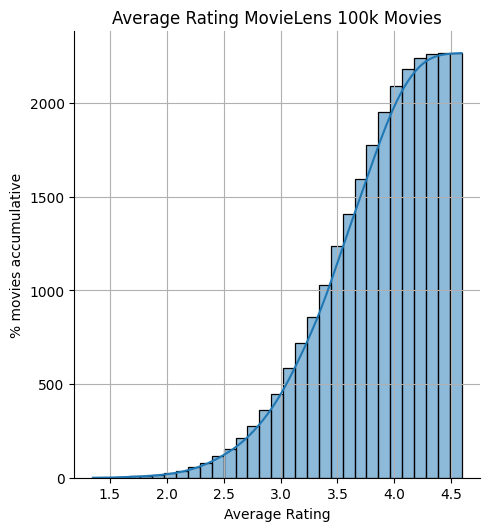

In [23]:
ax = sns.displot(avg_rating_movies_least_10_votes.values, kde=True, cumulative=True)
ax.set(xlabel='Average Rating', ylabel='% movies accumulative', title='Average Rating MovieLens 100k Movies')
plt.grid(True)
plt.show()

# Analyzing distribution of data captured from others TMDB fields

In [24]:
tmdb_greater_10_votes.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [25]:
tmdb_greater_10_votes.vote_count

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4790       17
4792       63
4796      658
4798      238
4802       16
Name: vote_count, Length: 4392, dtype: int64

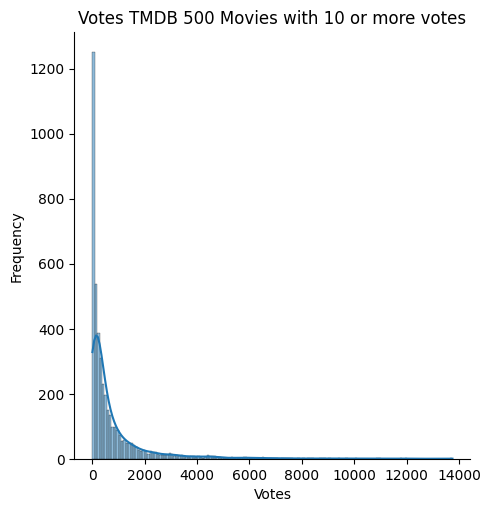

In [26]:
# create a distplot
ax = sns.displot(tmdb_greater_10_votes.vote_count, kde=True)
ax.set(xlabel='Votes', ylabel='Frequency', title='Votes TMDB 500 Movies with 10 or more votes')
ax = ax

In [27]:
# check the budget of the movies
tmdb.budget

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4798       220000
4799         9000
4800            0
4801            0
4802            0
Name: budget, Length: 4803, dtype: int64

In [28]:
# select movies with budget greater than 0
tmdb.query('budget > 0').budget

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4791           13
4792        20000
4796         7000
4798       220000
4799         9000
Name: budget, Length: 3766, dtype: int64

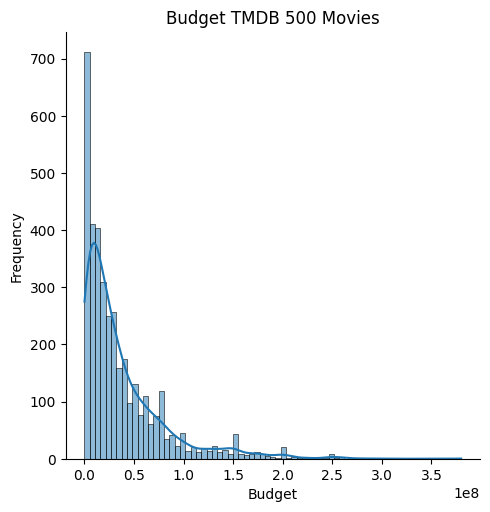

In [29]:
# create histogram based on budget
ax = sns.displot(tmdb.query('budget > 0').budget, kde=True)
ax.set(xlabel='Budget', ylabel='Frequency', title='Budget TMDB 500 Movies')
ax = ax

In [30]:
# check popularity of the movies
tmdb.popularity

0       150.437577
1       139.082615
2       107.376788
3       112.312950
4        43.926995
           ...    
4798     14.269792
4799      0.642552
4800      1.444476
4801      0.857008
4802      1.929883
Name: popularity, Length: 4803, dtype: float64

In [31]:
# check popularity of the movies = 0
tmdb.query('popularity == 0')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


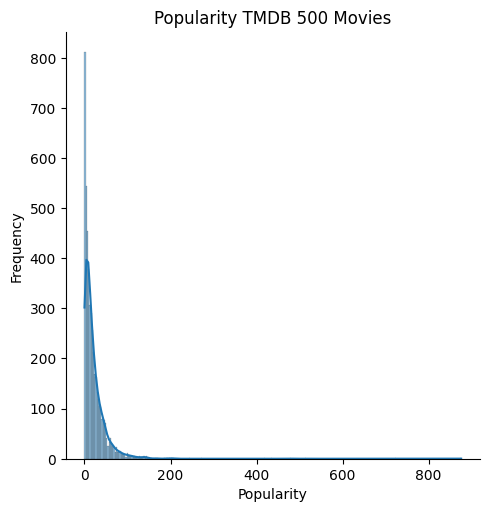

In [32]:
# create histogram based on popularity
ax = sns.displot(tmdb.popularity, kde=True)
ax.set(xlabel='Popularity', ylabel='Frequency', title='Popularity TMDB 500 Movies')
ax = ax

In [33]:
# check runtime of the movies
tmdb.runtime

0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4798     81.0
4799     85.0
4800    120.0
4801     98.0
4802     90.0
Name: runtime, Length: 4803, dtype: float64

In [34]:
# check runtime of the movies = 0
tmdb.query('runtime == 0')


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1011,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,53953,"[{""id"": 10292, ""name"": ""gore""}, {""id"": 12339, ...",de,The Tooth Fairy,A woman and her daughter (Nicole Muñoz) encoun...,0.716764,[],[],2006-08-08,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,The Tooth Fairy,4.3,13
3112,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,41894,[],en,Blood Done Sign My Name,A drama based on the true story in which a bla...,0.397341,[],[],2010-02-01,0,0.0,[],Released,No one changes the world alone.,Blood Done Sign My Name,6.0,5
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3809,4000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,158150,[],en,How to Fall in Love,"An accountant, who never quite grew out of his...",1.923514,"[{""name"": ""Annuit Coeptis Entertainment Inc."",...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-21,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,How to Fall in Love,5.2,20
3953,0,"[{""id"": 10752, ""name"": ""War""}, {""id"": 18, ""nam...",NaN,281230,"[{""id"": 187056, ""name"": ""woman director""}]",en,Fort McCoy,Unable to serve in World War II because of a h...,0.384496,[],[],2014-01-01,0,0.0,[],Released,NaN,Fort McCoy,6.3,2
3992,0,[],NaN,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2015-06-26,0,0.0,[],Released,NaN,Sardaarji,9.5,2
4068,0,[],NaN,371085,[],en,Sharkskin,The Post War II story of Manhattan born Mike E...,0.027801,[],[],2015-01-01,0,0.0,[],Released,NaN,Sharkskin,0.0,0
4118,0,[],NaN,325140,[],en,Hum To Mohabbat Karega,"Raju, a waiter, is in love with the famous TV ...",0.001186,[],[],2000-05-26,0,0.0,[],Released,NaN,Hum To Mohabbat Karega,0.0,0
4205,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://www.imdb.com/title/tt1289419/,66468,[],en,N-Secure,N-Secure is a no holds-barred thrilling drama ...,0.134560,[],[],2010-10-15,2592808,0.0,[],Released,NaN,N-Secure,4.3,4
4210,0,"[{""id"": 10749, ""name"": ""Romance""}]",NaN,74084,[],hi,दिल जो भी कहे,"During the British rule in India, several Indi...",0.122704,"[{""name"": ""Entertainment One Pvt. Ltd."", ""id"":...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2006-12-07,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Dil Jo Bhi Kahey...,0.0,0


In [35]:
# check NaN values on runtime
tmdb.runtime.isnull().sum()

2

In [36]:
# drop NaN values on runtime
tmdb.dropna(subset=['runtime'], inplace=True)


In [37]:
# select movies with runtime greater than 0
tmdb.query('runtime > 0').runtime

0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4798     81.0
4799     85.0
4800    120.0
4801     98.0
4802     90.0
Name: runtime, Length: 4766, dtype: float64

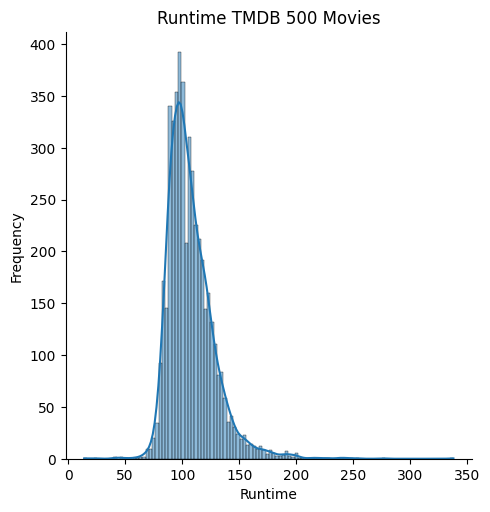

In [38]:
# create histogram based on runtime
ax = sns.displot(tmdb.query('runtime > 0').runtime, kde=True)   
ax.set(xlabel='Runtime', ylabel='Frequency', title='Runtime TMDB 500 Movies')
ax = ax

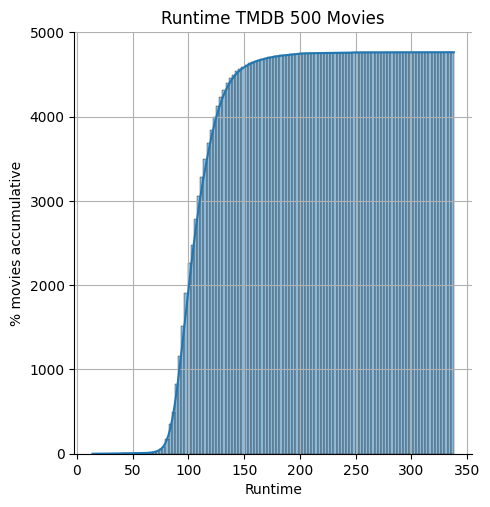

In [39]:
# create histogram based on runtime and cumulative and  y will be density
ax = sns.displot(tmdb.query('runtime > 0').runtime, kde=True, cumulative=True)
ax.set(xlabel='Runtime', ylabel='% movies accumulative', title='Runtime TMDB 500 Movies')
plt.grid(True)
plt.show()

In [40]:
# check quantile of runtime 0.8
tmdb.query('runtime > 0').runtime.quantile(0.8)


121.0

So we know that 80% of our movies are 121 minutes or less, and 20% are longer

# Movielens: movies with average at least 10 votes

    Let's analyze the average of averages of MovieLens movies

In [41]:
avg_rating_movies_least_10_votes

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2269, dtype: float64

In [42]:
# mean rating per movie with at least 10 votes
avg_rating_movies_least_10_votes.mean()


3.4320503405352594

In [43]:
# create a column with the mean of the average rating per movie with at least 10 votes
mean_votes = list()
for i in range(1, len(avg_rating_movies_least_10_votes)):
    mean_votes.append(avg_rating_movies_least_10_votes[0:i].mean())
mean_votes


[3.9209302325581397,
 3.676374207188161,
 3.5374545996639024,
 3.4209480926050695,
 3.5259741603585653,
 3.469175997829668,
 3.420007998139716,
 3.429533513523767,
 3.456410742179856,
 3.352874931119765,
 3.396552967684635,
 3.363506887044249,
 3.406839377909513,
 3.4332165225577675,
 3.451002087720583,
 3.4057690026925918,
 3.352488473122439,
 3.360371448086299,
 3.353100436198716,
 3.34169541438878,
 3.3313765851321713,
 3.3447231039898,
 3.3514742733815477,
 3.387965875627014,
 3.412973556391407,
 3.404174978311576,
 3.425614825316986,
 3.4337122869128076,
 3.4475781010027933,
 3.4424344719950075,
 3.4507430374145236,
 3.422391013147493,
 3.419060982446054,
 3.40869644374666,
 3.424887101300415,
 3.417169649140109,
 3.4393473639752203,
 3.4400036363518125,
 3.4550555181639973,
 3.4495614831510735,
 3.4558221786839747,
 3.433832556918073,
 3.441766683501374,
 3.4432967795374996,
 3.4437021502486322,
 3.442752103504097,
 3.4283255881604546,
 3.421634281264255,
 3.4327573911704268,
 3.

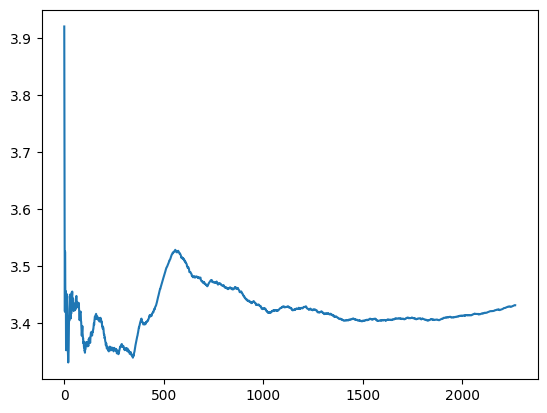

In [44]:
# plot the mean_votes
plt.plot(mean_votes)

Notice that, in the beginning, the average has constant dips and rises. However, at a certain point in the set (around 1000 records), the distribution seems to stabilize, remaining almost constant.

This happens because, when we have few elements, each new record in the set makes a very significant difference. However, as the sample becomes more populated, the new values ​​interfere less with the final result.

##### Note, that these movies are in a specific order, provided by the dataset itself, and we don't know if this order has any hidden characteristics that could be affecting this distribution. Let's test this by randomizing the order of our set:

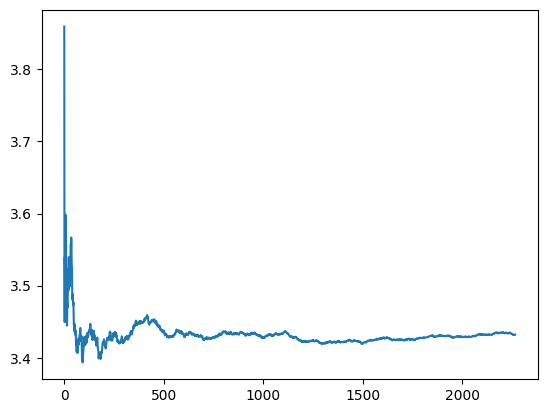

In [45]:
# create a plot with random info of average rating per movie with at least 10 votes

np.random.seed(75243)

temp = avg_rating_movies_least_10_votes.sample(frac=1)

mean_votes = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(mean_votes)


# Mean confidence interval with t and ztest
    The objective, then, is to use the Z Test to find a confidence interval that will cover not only the films in our sample, but also those outside of it.

In [46]:
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW

In [47]:
# calculate confidence interval
zconfint(avg_rating_movies_least_10_votes)

(3.4112459477469557, 3.452854733323563)

In [48]:
# testing with tconfint
DescrStatsW(avg_rating_movies_least_10_votes).tconfint_mean()

(3.411234839229381, 3.4528658418411395)

# ZTest for a sample
    Now, I'm going to analyze a specific movie in our set - in this case, the first record of the dataset -, comparing its average with the other values ​​that we obtain. I'll use the CSV movies.

In [49]:
df_movies = pd.read_csv('data/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [50]:
# select the first movie
df_movies.query('movieId == 1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [51]:
# select users that rated movieID 1
movieID_1 = rates.query('movieId == 1')
movieID_1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


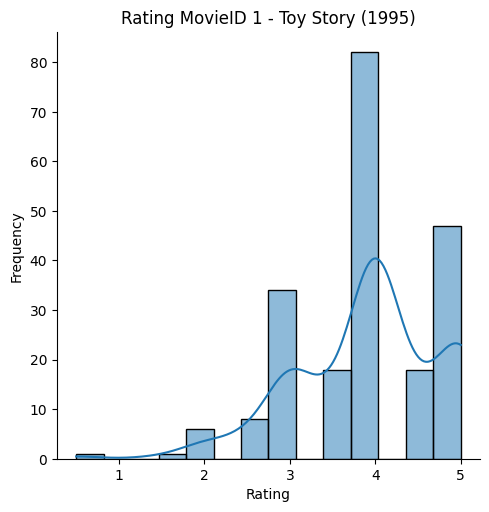

In [52]:
# create a displot of the ratings of movieID 1
ax = sns.displot(movieID_1.rating, kde=True)
ax.set(xlabel='Rating', ylabel='Frequency', title='Rating MovieID 1 - Toy Story (1995)')
ax = ax

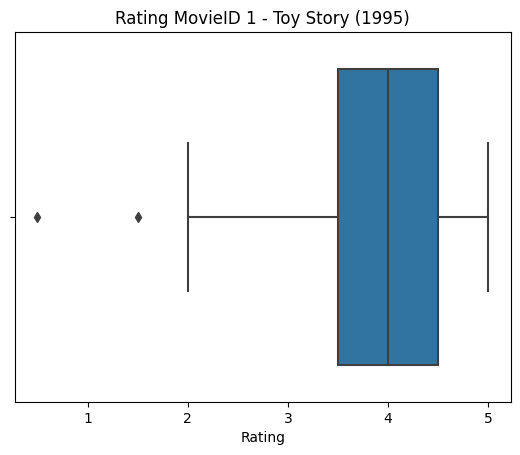

In [53]:
# create a boxplot of the ratings of movieID 1
ax = sns.boxplot(x=movieID_1.rating)
ax.set(xlabel='Rating', title='Rating MovieID 1 - Toy Story (1995)')
ax = ax

In [54]:
movieID_1.rating.mean()

3.9209302325581397


Indeed, the average of the data I collected is higher than the average of movies with at least 10 votes, which was 3.43

In [55]:
# check the size of the sample
movieID_1.rating.count()

215

In [56]:
# check zconfint
zconfint(movieID_1.rating)


(3.8093359183563402, 4.032524546759939)


With alpha = 0.5, we have a confidence interval between approximately 3.80 and 4.03 of the mean of this movie in the real world, and not just in the data we collected. This range is higher than the average for movies with at least ten votes.

In [57]:
# using ztest comparing the mean of the sample with the movies with at least ten votes.
from statsmodels.stats.weightstats import ztest
ztest(movieID_1.rating, value=avg_rating_movies_least_10_votes.mean())


(8.586342305916732, 8.978190401885648e-18)

    ztest() returns two variables: the statistical value and the pvalue. The latter is a very low value, and much smaller than 0.05 (the alpha). Therefore, we can rule out the hypothesis that, in the real world, the Toy Story mean equals 3.4320503405352603 (also called the null hypothesis).

    The more data we have, the chances of this equivalence existing become smaller. Therefore, this type of equality test is quite delicate when we have a lot of data.

# Comparing the mean of two samples
    I'll get distribution of Toy Story (movieID_1) movie notes and all movie notes (rates). Then we will check how different they are.

In [58]:
# check the confidence interval between movieID 1 and all the movies.
zconfint(movieID_1.rating, rates.rating)

(0.2799245129192442, 0.5588219849631111)

****The result means that the average of movieID_1.rating is between 0.279 and 0.558 higher than rates.rating****

In [59]:
#  check ztest between movieID 1 and all the movies.
ztest(movieID_1.rating, rates.rating)

(5.894327101501841, 3.762112778881965e-09)

****The p value is less than 0.05. Therefore, statistically, there is a significant difference, which is represented within the confidence interval we calculated earlier.****

In [60]:
# aplying tttest with those 2 samples
# The scipy.stats module has a function that allows you to perform this test with two different sets, called ttest_ind()

from scipy.stats import ttest_ind
ttest_ind(movieID_1.rating, rates.rating)

Ttest_indResult(statistic=5.894327101501841, pvalue=3.774003138720876e-09)

In [61]:
# confidence interval with the T Test Using ttest DescribeStatsW and compare with other sample.
descr_all_rates = DescrStatsW(rates.rating)
descr_movieID_1 = DescrStatsW(movieID_1.rating)
compare = descr_all_rates.get_compare(descr_movieID_1)
compare.summary()



,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


****We have a p value equal to 0.000, discarding the hypothesis that the sets are equal. Also, we have the confidence interval, which is from -0.559 to -0.280. The way we wrote the code, the test performed by the summary() function is the Z Test. To repeat the operation as a T Test, we just need to pass the parameter use_t=True****


In [62]:
# To repeat the operation as a z-test, just pass the use_t=False parameter.
descr_all_rates = DescrStatsW(rates.rating)
descr_movieID_1 = DescrStatsW(movieID_1.rating)
compare = descr_all_rates.get_compare(descr_movieID_1)
compare.summary(use_t=False)


,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


# Visualizing the data

Text(0.5, 1.0, 'Comparison between all rates and Toy Story')

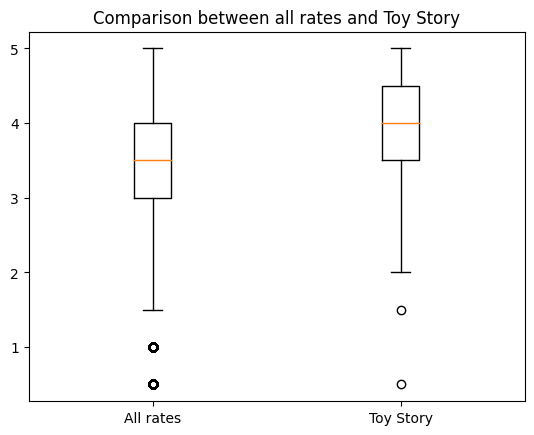

In [65]:
# create a boxplot of rates.rating and movieID_1.rating
plt.boxplot([rates.rating, movieID_1.rating], labels=['All rates', 'Toy Story'])
plt.title('Comparison between all rates and Toy Story')

Visually, it is possible to see that the average appears higher in the distribution of Toy Story scores. We must also remember that in this plot we were unable to analyze the number of elements - a factor that is taken into account when analyzing statistical data.

# Comparing Movies

In [69]:
# select more movies (3)

df_movies.query('movieId == [1, 593, 72226]')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


In [70]:
# get the ratings of the movies

movieID_593 = rates.query('movieId == 593')
movieID_72226 = rates.query('movieId == 72226')

Text(0.5, 1.0, 'Comparison between Toy Story, Silence of the Lambs and Fantastic Mr. Fox')

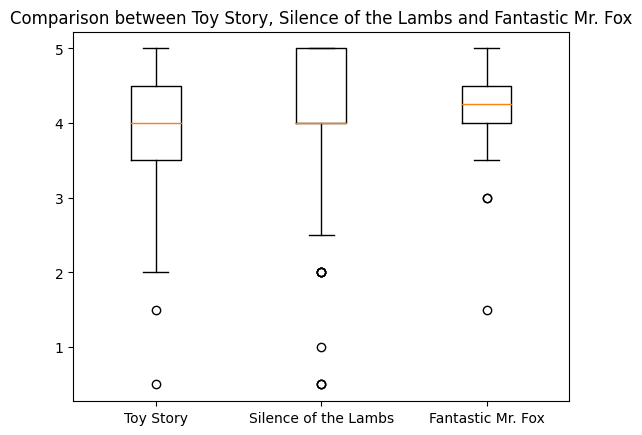

In [71]:
# create a boxplot of the ratings of the movies
plt.boxplot([movieID_1.rating, movieID_593.rating, movieID_72226.rating], labels=['Toy Story', 'Silence of the Lambs', 'Fantastic Mr. Fox'])
plt.title('Comparison between Toy Story, Silence of the Lambs and Fantastic Mr. Fox')

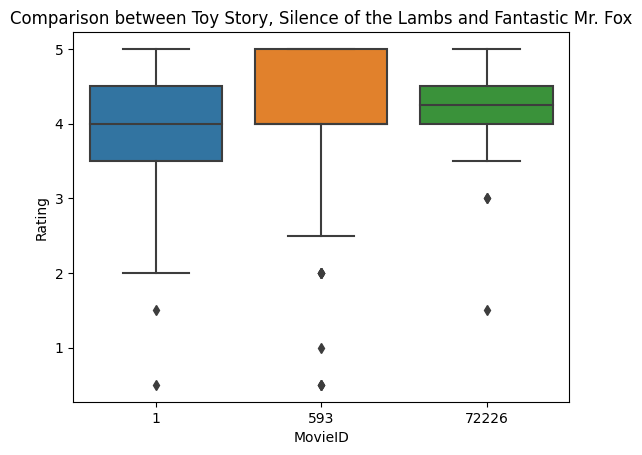

In [73]:
# create with sns boxplot
ax = sns.boxplot(x='movieId', y='rating', data=rates.query('movieId in [1, 593, 72226]'))
ax.set(xlabel='MovieID', ylabel='Rating', title='Comparison between Toy Story, Silence of the Lambs and Fantastic Mr. Fox')
ax = ax

In [72]:
movieID_72226.describe()

,userId,movieId,rating,timestamp
count,18.000000,18.0,18.000000,1.800000e+01
mean,329.722222,72226.0,4.083333,1.395218e+09
std,174.748157,0.0,0.895249,9.459862e+07
min,73.000000,72226.0,1.500000,1.262899e+09
25%,167.000000,72226.0,4.000000,1.279706e+09
50%,326.000000,72226.0,4.250000,1.441777e+09
75%,466.250000,72226.0,4.500000,1.471770e+09
max,610.000000,72226.0,5.000000,1.498522e+09



Both Toy Story and Silence of the Lambs have a median of 4, Fantastic Mr. Fox is actually 4.25

However, several pieces of information are being disregarded in this analysis, such as the number of votes these films received.

##### Let's analyze with statistical tests
    For this case I'll use DescrStatsW().

In [75]:
# testing with DescrStatsW() comparing between movieID_1 and movieID_593
descr_movieID_1 = DescrStatsW(movieID_1.rating)
descr_movieID_593 = DescrStatsW(movieID_593.rating)
compare = descr_movieID_1.get_compare(descr_movieID_593)
compare.summary()


,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


There is a statistically valid difference between these sets.

Applying the Z Test with alpha = 0.05, we found a statistical difference between the films Toy Story and Silence of the Lambs, with a p value equal to 0.02 and a confidence interval between -0.391 and -0.090.

In [77]:
# testing with DescrStatsW() - comparing between movieID_593 and movieID_72226
descr_movieID_72226 = DescrStatsW(movieID_72226.rating)
descr_movieID_593 = DescrStatsW(movieID_593.rating)
compare = descr_movieID_72226.get_compare(descr_movieID_593)
compare.summary()


,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332



This time, our p value does not indicate a significant difference (as it is not less than 0.05), and the range includes both the chance that the movie is worse and the chance that it is better.

In [78]:
# comparing desc_movieID_1 and desc_movieID_72226
descr_movieID_1 = DescrStatsW(movieID_1.rating)
descr_movieID_72226 = DescrStatsW(movieID_72226.rating)
compare = descr_movieID_1.get_compare(descr_movieID_72226)
compare.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


Likewise, we don't have a significant difference, and the range also includes those two possibilities. So the only difference we found in our data was between Toy Story and Silence of the Lambs movies - where the latter movie is better (maybe a little better, maybe reasonably better).

In [79]:
# check the amount of votes for which movie

rates.query('movieId in [1, 593, 72226]').groupby('movieId').rating.count()

movieId
1        215
593      279
72226     18
Name: rating, dtype: int64

Note that the films Toy Story and Silence of the Lambs have a substantial amount of notes, while Fantastic Mr. Fox has only 18 notes. Therefore, it is more interesting to use the T Test when we are going to work with the data from this film.

Running the test without the certainty that we could use it ended up influencing our reading. Therefore, we must always explore our data to ensure that tests are performed correctly.

# FinNon-parametric comparison with Wilcoxon Ranksums
    We cannot always apply certain tests. The T Test and Z Test, for example, assume that the data distribution is normal.

    However, the distribution of MovieLens and TMDB 5000 means were not exactly normal distributions, as both have more populated curves on the left.

In [80]:
# I will use the normaltest() from the scipy.stats module

from scipy.stats import normaltest
_, p = normaltest(movieID_1.rating)
p

0.00011053430732728716


We will have a p value of 0.00011053430732728716 - that is, less than 0.05. As this function tests the null hypothesis that the data set comes from a normal distribution, a result less than 0.05 indicates that we are not working with a normal distribution.

In [81]:
# Using function ranksums() from scipy.stats module to compare the distributions of two samples.
from scipy.stats import ranksums
_, p = ranksums(movieID_1.rating, movieID_593.rating)
p

0.0003267718756440693

In this case, the p value is significant, discarding the null hypothesis. In ranksums(), the null hypothesis is that the two samples came from the same distribution. The alternative hypothesis, which we will admit in this case (since the p value was very small), is that the values ​​of a sample have a tendency to be greater than those of the other sample.

# Final Thoughts    
        
    Notice that when we worked with Test T and Test Z we were referring to means - which made sense in a normal distribution. However, in a non-parametric distribution, we do not use means, but rather random samples from each tested set.

    That is, if we take random scores for Toy Story and Silence of the Lambs, the scores for the latter, in general, are higher. Analyzes like this, along with the averages, boxplots, histograms, and other information we learned to test earlier, allow us to conclude when one movie is better than another